In [ ]:
# Import necessary libraries
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

drive_path = "/content/drive/MyDrive/"
print("Files in MyDrive:", os.listdir(drive_path))

Files in MyDrive: ['Science project.gslides', 'Untitled spreadsheet.gsheet', 'Human Behavior research project results.xlsx', 'Untitled document (45).gdoc', 'RESEARCH PROJECT OCTOBER 11.docx', 'Untitled document (44).gdoc', 'Social Psychology.gdoc', 'Untitled document (43).gdoc', 'Comm skills.gdoc', 'Insights from main article.gdoc', 'Script - com skills.gdoc', 'Com skills.gslides', 'Comm skills speech.gdoc', 'Spanish.gdoc', 'Untitled document (42).gdoc', 'Lab 5- Coke-Pepsi experiment.gdoc', 'Who invented the computer.gdoc', 'Com skills - 2 min speech.gdoc', '2 min video.mp4', 'Comp 1_1.mp4', 'Stats Computer Exam on SPSS.gdoc', 'Untitled document (41).gdoc', 'Question 4.gdoc', 'Untitled document (40).gdoc', 'Comm skills cloning.gdoc', 'comm skills.gdoc', 'MOCK EXAM.gdoc', 'Programming final (1).gdoc', 'Untitled document (39).gdoc', 'history.mov', 'stats final.gdoc', 'Untitled document (38).gdoc', 'Untitled document (37).gdoc', 'Untitled document (36).gdoc', 'Untitled document (35).gdoc'

In [ ]:
dataset_path = "/content/drive/MyDrive/Skin Cancer Dataset"
print("Folders inside dataset:", os.listdir(dataset_path))

Folders inside dataset: ['train', 'test']


In [ ]:
import tensorflow as tf

dataset_path = "/content/drive/MyDrive/Skin Cancer Dataset"  # Update this path if needed

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(dataset_path, 'train'),
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(dataset_path, 'test'),
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)

Found 1610 files belonging to 2 classes.
Found 410 files belonging to 2 classes.


In [ ]:
# Load EfficientNetB0 without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pretrained layers
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification output

In [ ]:
# Create model
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [11]:
# Train model
history = model.fit(train_ds, validation_data=test_ds, epochs=10, callbacks=[early_stopping])

'''
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.7576 - loss: 0.4701 - val_accuracy: 0.9220 - val_loss: 0.1897
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.9067 - loss: 0.2377 - val_accuracy: 0.9488 - val_loss: 0.1227
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.9093 - loss: 0.2242 - val_accuracy: 0.9659 - val_loss: 0.1017
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.9335 - loss: 0.1656 - val_accuracy: 0.9585 - val_loss: 0.1102
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.9267 - loss: 0.1820 - val_accuracy: 0.9707 - val_loss: 0.0885
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.9331 - loss: 0.1573 - val_accuracy: 0.9707 - val_loss: 0.0862
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.9427 - loss: 0.1375 - val_accuracy: 0.9683 - val_loss: 0.0884
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9530 - loss: 0.1103 - val_accuracy: 0.9756 - val_loss: 0.0872
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9611 - loss: 0.0970 - val_accuracy: 0.9366 - val_loss: 0.1221
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.9498 - loss: 0.1116 - val_accuracy: 0.9585 - val_loss: 0.0944'''

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.7576 - loss: 0.4701 - val_accuracy: 0.9220 - val_loss: 0.1897
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.9067 - loss: 0.2377 - val_accuracy: 0.9488 - val_loss: 0.1227
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.9093 - loss: 0.2242 - val_accuracy: 0.9659 - val_loss: 0.1017
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.9335 - loss: 0.1656 - val_accuracy: 0.9585 - val_loss: 0.1102
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.9267 - loss: 0.1820 - val_accuracy: 0.9707 - val_loss: 0.0885
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.9331 - loss: 0.1573 - val_accuracy: 0.9707 - val_loss: 0.0862
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.9427 - loss: 0.1375 - val_accuracy: 0.9683 - val_loss: 0.0884
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9530 - loss: 0.1103 - val_accuracy: 0.9756 - v

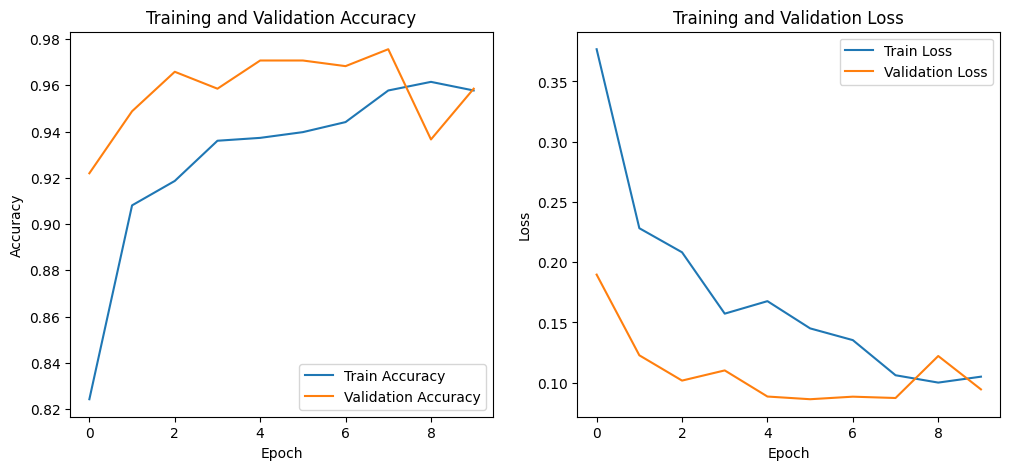

In [14]:
# Plot accuracy and loss curves
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')


    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot accuracy and loss curves
plot_history(history)